# Import Python Libraries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Dataset

In [23]:
df = pd.read_csv("Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30204,30203,406-9626742-4153157,04-12-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,3XL,Shipped,...,INR,517.00,BENGALURU,KARNATAKA,560075.0,IN,False,NaN,NaN,NaN
30205,30204,404-4363088-0282741,04-12-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,438.00,NEW DELHI,DELHI,110091.0,IN,False,NaN,NaN,NaN
30206,30205,406-2285407-4222733,04-12-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,3XL,Shipped,...,INR,1115.00,Bangalore Urban,KARNATAKA,560043.0,IN,False,NaN,NaN,NaN
30207,30206,406-2285407-4222733,04-12-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,3XL,Shipped,...,INR,1149.00,Bangalore Urban,KARNATAKA,560043.0,IN,False,NaN,NaN,NaN


# Data Cleaning

In [4]:
#Check for missing values per column (count)

print(df.isnull().sum())

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               1866
Amount                 1866
ship-city                12
ship-state               12
ship-postal-code         12
ship-country             12
B2B                       0
fulfilled-by          19500
New                   30209
PendingS              30209
dtype: int64


In [24]:
#Check for rows with missing values (any)

print(df.isnull().any(axis=1).sum())

30209


In [25]:
#Drop columns with 20% missing values

df.dropna(thresh=0.8, axis=1, inplace=True) 

In [11]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30204,30203,406-9626742-4153157,04-12-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,3XL,Shipped,1,INR,517.00,BENGALURU,KARNATAKA,560075.0,IN,False,NaN
30205,30204,404-4363088-0282741,04-12-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,438.00,NEW DELHI,DELHI,110091.0,IN,False,NaN
30206,30205,406-2285407-4222733,04-12-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,3XL,Shipped,1,INR,1115.00,Bangalore Urban,KARNATAKA,560043.0,IN,False,NaN
30207,30206,406-2285407-4222733,04-12-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,3XL,Shipped,1,INR,1149.00,Bangalore Urban,KARNATAKA,560043.0,IN,False,NaN


In [26]:
df['Amount'].fillna(0, inplace = True)
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               1866
Amount                    0
ship-city                12
ship-state               12
ship-postal-code         12
ship-country             12
B2B                       0
fulfilled-by          19500
dtype: int64

In [27]:
#Drop rows with any missing values

df.dropna(inplace=True) 

In [28]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30186,30185,403-2924372-4461160,04-12-2022,Cancelled,Merchant,Amazon.in,Standard,Shirt,S,On the Way,0,INR,437.14,panvel,MAHARASHTRA,410206.0,IN,False,Easy Ship
30187,30186,403-2924372-4461160,04-12-2022,Cancelled,Merchant,Amazon.in,Standard,Shirt,M,On the Way,0,INR,437.14,panvel,MAHARASHTRA,410206.0,IN,False,Easy Ship
30193,30192,407-1064158-5677135,04-12-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,1,INR,654.00,GHAZIABAD,UTTAR PRADESH,201009.0,IN,False,Easy Ship
30195,30194,407-2727693-8699567,04-12-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,S,Shipped,1,INR,736.00,DHARWAD,KARNATAKA,580001.0,IN,False,Easy Ship


In [29]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [30]:
df.shape

(10233, 19)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10233 entries, 0 to 30197
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               10233 non-null  int64  
 1   Order ID            10233 non-null  object 
 2   Date                10233 non-null  object 
 3   Status              10233 non-null  object 
 4   Fulfilment          10233 non-null  object 
 5   Sales Channel       10233 non-null  object 
 6   ship-service-level  10233 non-null  object 
 7   Category            10233 non-null  object 
 8   Size                10233 non-null  object 
 9   Courier Status      10233 non-null  object 
 10  Qty                 10233 non-null  int64  
 11  currency            10233 non-null  object 
 12  Amount              10233 non-null  float64
 13  ship-city           10233 non-null  object 
 14  ship-state          10233 non-null  object 
 15  ship-postal-code    10233 non-null  float64
 16  ship-coun

In [32]:
#Explore data further using descriptive statistics:

df.describe()

,index,Qty,Amount,ship-postal-code
count,10233.000000,10233.000000,10233.000000,10233.000000
mean,14877.290726,0.864263,609.163610,457459.340565
std,8282.859503,0.355409,274.325889,198228.004652
min,0.000000,0.000000,0.000000,110001.000000
25%,7591.000000,1.000000,421.000000,314406.000000
50%,14743.000000,1.000000,568.000000,490025.000000
75%,21792.000000,1.000000,725.000000,600014.000000
max,30196.000000,5.000000,5495.000000,989898.000000


In [33]:
#count unique values

df.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,10183
Order ID,9323
Date,19
Status,8
Fulfilment,1
Sales Channel,1
ship-service-level,1
Category,8
Size,11
Courier Status,2


In [34]:
#names of unique values

df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 3, 7, 12, 14, 15, 18, 23, 25, 26, 32, 3..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 403..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,[Merchant]
Sales Channel,[Amazon.in]
ship-service-level,[Standard]
Category,"[T-shirt, Shirt, Blazzer, Socks, Trousers, Wal..."
Size,"[S, 3XL, L, XS, 6XL, XXL, M, XL, Free, 5XL, 4XL]"
Courier Status,"[On the Way, Shipped]"


In [35]:
#Duplicate values

df.duplicated().sum()

50

In [36]:
#remove duplicate values

df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [38]:
# Fix inconsistencies in categorical data 

df['B2B'].replace(to_replace=[True,False],value=[1,0], inplace=True)
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,0,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,0,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,0,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,0,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,0,Easy Ship


# Analyze and visualize the data

In [40]:
#Identify outliers (e.g., using IQR method)

Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(lower_bound)
print(upper_bound)

-32.75000000000006
1179.65


In [43]:
# Cap outliers to IQR bounds

df.loc[df["Amount"] < lower_bound, "Amount"] = lower_bound
df.loc[df["Amount"] > upper_bound, "Amount"] = upper_bound

In [48]:
# Ensure 'Date' is in datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [129]:
# Extract day of the week from the date

df["Day of Week"] = df["Date"].dt.day_name()

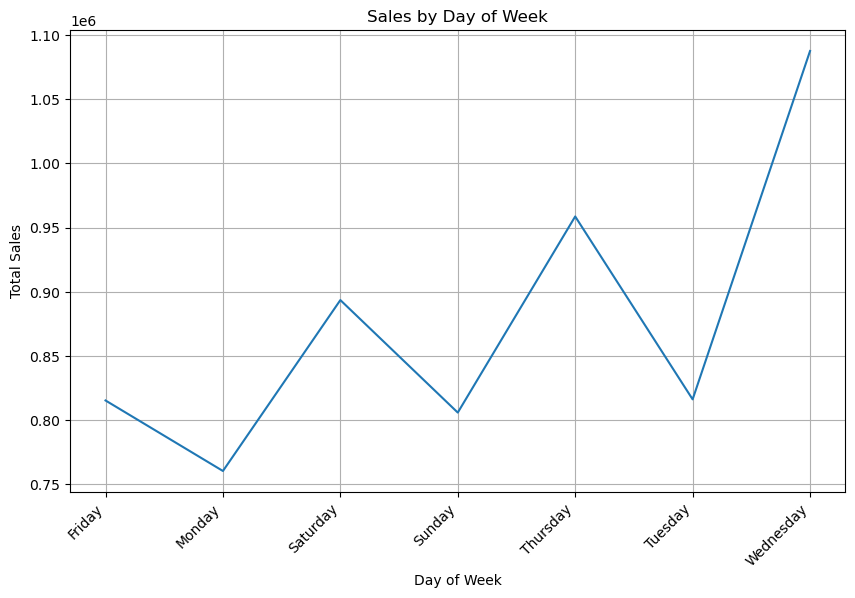

In [130]:
# Analyze daily sales
daily_sales = df.groupby("Day of Week")["Amount"].sum()
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.title("Sales by Day of Week")
plt.xticks(rotation=45, ha="right")  # Rotate day labels for better readability
plt.grid(True)
plt.show()


 This code calculates the total sales for each day of the week. 


In [131]:
# Calculate the average daily sales

average_daily_sales = df.groupby("Date")["Amount"].sum().mean()
print(f"Average Daily Sales: INR {average_daily_sales:.2f}")

Average Daily Sales: INR 323026.78


In [132]:
# Identify the day of the week with the highest and lowest sales

highest_sales_day = daily_sales.idxmax()
lowest_sales_day = daily_sales.idxmin()
print(f"Day with Highest Sales: {highest_sales_day}")
print(f"Day with Lowest Sales: {lowest_sales_day}")

Day with Highest Sales: Wednesday
Day with Lowest Sales: Monday


# Python code using Pandas to analyze sales by ship-city or region in  Amazon sale report data:



In [133]:
# Option 1: Analyze by Ship City (More granular but might have privacy concerns)

city_sales = df.groupby("ship-city")["Amount"].sum()
print("Top 10 Cities by Sales:")
print(city_sales.nlargest(10))  # Show the top 10 cities with highest sales

Top 10 Cities by Sales:
ship-city
BENGALURU    424917.04
HYDERABAD    332444.76
NEW DELHI    312214.46
MUMBAI       277906.17
PUNE         191086.25
CHENNAI      178177.30
KOLKATA      115709.00
GURUGRAM      94852.67
LUCKNOW       85889.17
THANE         70785.22
Name: Amount, dtype: float64


In [71]:
# Option 2: Analyze by Ship Region (Less granular but potentially more privacy-friendly)
# Assuming you have a separate column 'ship-state' or 'ship-country' for region

# a) Group by State

state_sales = df.groupby("ship-state")["Amount"].sum()
print("Top 5 States by Sales:")
print(state_sales.nlargest(5))  # Show the top 5 states with highest sales

Top 5 States by Sales:
ship-state
MAHARASHTRA      1015173.37
KARNATAKA         708039.90
UTTAR PRADESH     592808.21
TELANGANA         493546.09
TAMIL NADU        409954.69
Name: Amount, dtype: float64


In [72]:
# b) Group by Country

country_sales = df.groupby("ship-country")["Amount"].sum()
print("Top 3 Countries by Sales:")
print(country_sales.nlargest(3))  # Show the top 3 countries with highest sales

Top 3 Countries by Sales:
ship-country
IN    6137508.75
Name: Amount, dtype: float64


# Python code using Pandas to analyze the distribution of order statuses in  Amazon sale report data:

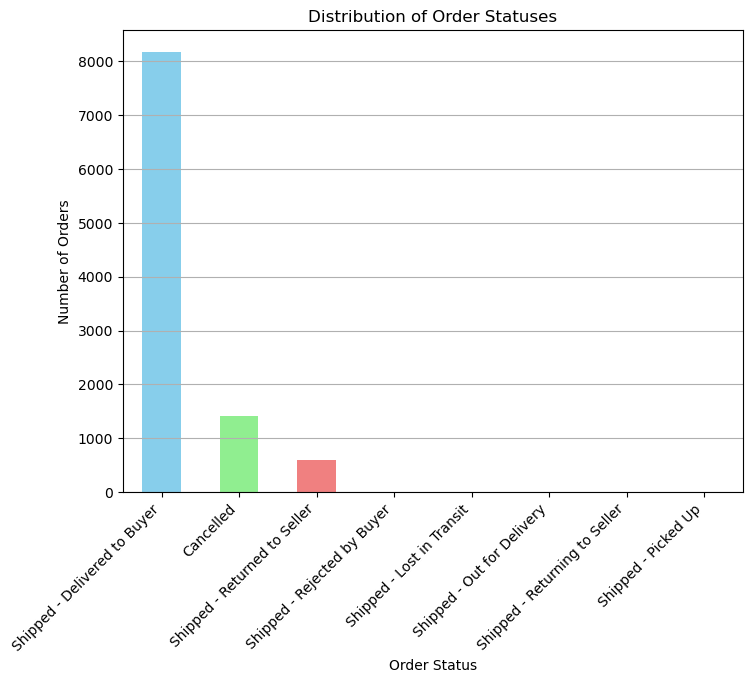

In [134]:
# Analyze order status distribution

order_status_counts = df["Status"].value_counts()
plt.figure(figsize=(8, 6))
order_status_counts.plot(kind="bar", color=['skyblue', 'lightgreen', 'lightcoral'])  # Adjust colors as needed
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.title("Distribution of Order Statuses")
plt.xticks(rotation=45, ha="right")  # Rotate status labels for better readability
plt.grid(axis='y')
plt.show()

In [135]:
# Calculate percentages (optional)

total_orders = len(df)
order_status_percentages = (order_status_counts / total_orders) * 100
print("Order Status Percentages:")
print(order_status_percentages)

Order Status Percentages:
Status
Shipped - Delivered to Buyer     80.261220
Cancelled                        13.895709
Shipped - Returned to Seller      5.774330
Shipped - Rejected by Buyer       0.019641
Shipped - Lost in Transit         0.019641
Shipped - Out for Delivery        0.009820
Shipped - Returning to Seller     0.009820
Shipped - Picked Up               0.009820
Name: count, dtype: float64


# Understand the overall sales performance, trends, and patterns over time.

In [136]:
# Calculate total sales per day

daily_sales = df.groupby(df["Date"])["Amount"].sum()

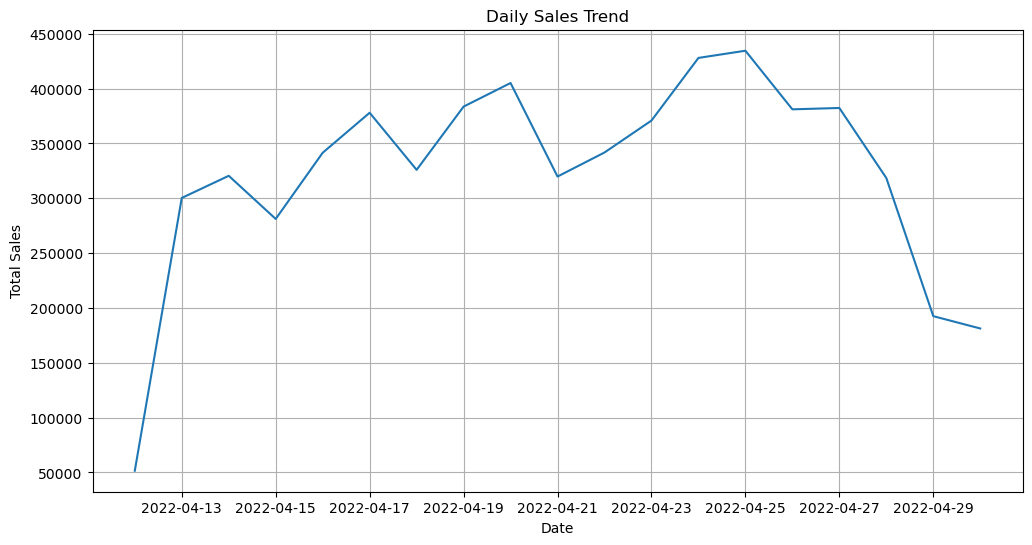

In [137]:
# Plot daily sales trend

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Daily Sales Trend")
plt.grid(True)
plt.show()

In [139]:
# Calculate additional sales metrics (optional)

total_sales = daily_sales.sum()
average_daily_sales = daily_sales.mean()
print(f"Total Sales: INR {total_sales:.2f}")
print(f"Average Daily Sales: INR {average_daily_sales:.2f}")

Total Sales: INR 6137508.75
Average Daily Sales: INR 323026.78


# Python code using Pandas and Matplotlib to analyze product categories, sizes, and quantities sold to identify popular products in your Amazon sales data

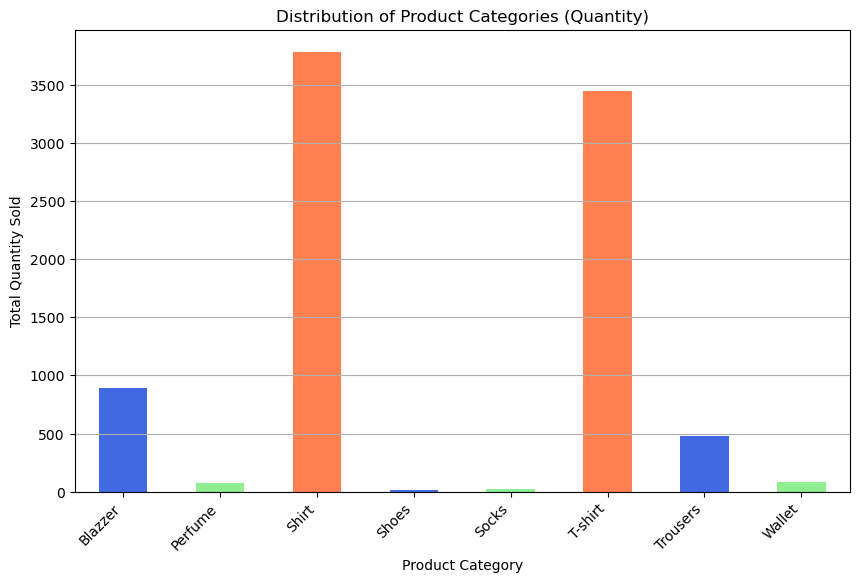

In [140]:
# Analyze product category distribution

category_sales = df.groupby("Category")["Qty"].sum()
plt.figure(figsize=(10, 6))
category_sales.plot(kind="bar", color=['royalblue', 'lightgreen', 'coral'])  # Adjust colors as needed
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.title("Distribution of Product Categories (Quantity)")
plt.xticks(rotation=45, ha="right")  # Rotate category labels for better readability
plt.grid(axis='y')
plt.show()

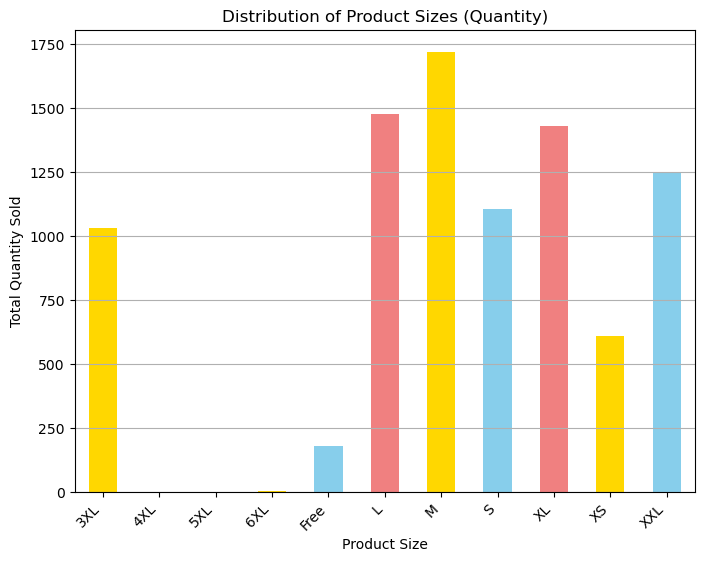

In [141]:
# Analyze product size distribution (if size data is relevant)

if "Size" in df.columns:
  size_sales = df.groupby("Size")["Qty"].sum()
  plt.figure(figsize=(8, 6))
  size_sales.plot(kind="bar", color=['gold', 'skyblue', 'lightcoral'])  # Adjust colors as needed
  plt.xlabel("Product Size")
  plt.ylabel("Total Quantity Sold")
  plt.title("Distribution of Product Sizes (Quantity)")
  plt.xticks(rotation=45, ha="right")  # Rotate size labels for better readability if needed
  plt.grid(axis='y')
  plt.show()

In [142]:
# Identify top-selling products by quantity

top_selling_products = df.groupby("Category")["Qty"].sum().nlargest(10)
print("Top 10 Selling Products (by Quantity):")
print(top_selling_products)

Top 10 Selling Products (by Quantity):
Category
Shirt       3781
T-shirt     3447
Blazzer      892
Trousers     482
Wallet        87
Perfume       80
Socks         20
Shoes         12
Name: Qty, dtype: int64


In [144]:
# Identify top-selling products by size

top_selling_products = df.groupby("Size")["Qty"].sum().nlargest(10)
print("Top 10 Selling Products (by Quantity):")
print(top_selling_products)

Top 10 Selling Products (by Quantity):
Size
M       1718
L       1477
XL      1427
XXL     1247
S       1106
3XL     1032
XS       610
Free     179
6XL        3
4XL        1
Name: Qty, dtype: int64


# Python code using Pandas to calculate sales revenue from your Amazon sale report data:

In [145]:
# Assuming 'Amount' represents the sales amount per item
# Calculate total sales revenue

total_sales_revenue = df["Amount"].sum()

In [146]:
# Calculate average order value (optional)

average_order_value = df.groupby("Order ID")["Amount"].sum().mean()

In [147]:
print(f"Total Sales Revenue: INR { total_sales_revenue:.2f}")

Total Sales Revenue: INR 6137508.75


In [89]:
# Assuming 'Amount' represents the sales amount per item and 'Category' represents the product category
# Calculate sales revenue by product category

category_revenue = df.groupby("Category")["Amount"].sum()

In [148]:
# Print the results (consider sorting by revenue for better readability)

print("Sales Revenue by Product Category:")
print(category_revenue)

Sales Revenue by Product Category:
Category
Blazzer      736165.65
Perfume       73407.94
Shirt       1891319.90
Shoes         13642.24
Socks         10162.97
T-shirt     3094959.12
Trousers     265952.80
Wallet        51898.13
Name: Amount, dtype: float64


In [149]:
# You can further analyze or visualize the results:
# Sort by revenue (highest to lowest)

category_revenue_sorted = category_revenue.sort_values(ascending=False)
print("\nTop 5 Product Categories by Revenue:")
print(category_revenue_sorted.head(5))


Top 5 Product Categories by Revenue:
Category
T-shirt     3094959.12
Shirt       1891319.90
Blazzer      736165.65
Trousers     265952.80
Perfume       73407.94
Name: Amount, dtype: float64


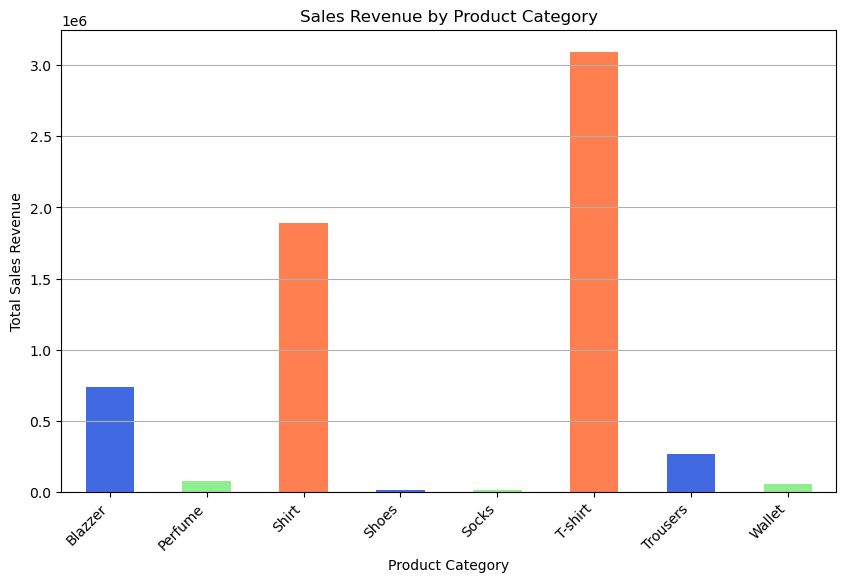

In [150]:
# Create a bar chart to visualize revenue distribution


plt.figure(figsize=(10, 6))
category_revenue.plot(kind="bar", color=['royalblue', 'lightgreen', 'coral'])  # Adjust colors as needed
plt.xlabel("Product Category")
plt.ylabel("Total Sales Revenue")
plt.title("Sales Revenue by Product Category")
plt.xticks(rotation=45, ha="right")  # Rotate category labels for better readability
plt.grid(axis='y')
plt.show()

# Analyze correlations between sales revenue and other variables


In [151]:
# Calculate correlation matrix for numerical variables (excluding 'Amount' itself)

numerical_cols = [col for col in df.columns if df[col].dtype != 'object']
correlation_matrix = df[numerical_cols].corr()

In [152]:
# Get correlations between 'Amount' (sales revenue) and other numerical variables

revenue_correlations = correlation_matrix["Amount"]

In [158]:
# Print correlations (excluding 'Amount' itself)

print("Correlations between Sales Revenue (Amount) and other Numerical Variables:")
for col in revenue_correlations.index:
    if col != "Amount":
        print(f"{col}: {revenue_correlations[col]:.2f}")

Correlations between Sales Revenue (Amount) and other Numerical Variables:
index: -0.02
Date: 0.02
Qty: 0.06
ship-postal-code: -0.06
B2B: 0.03


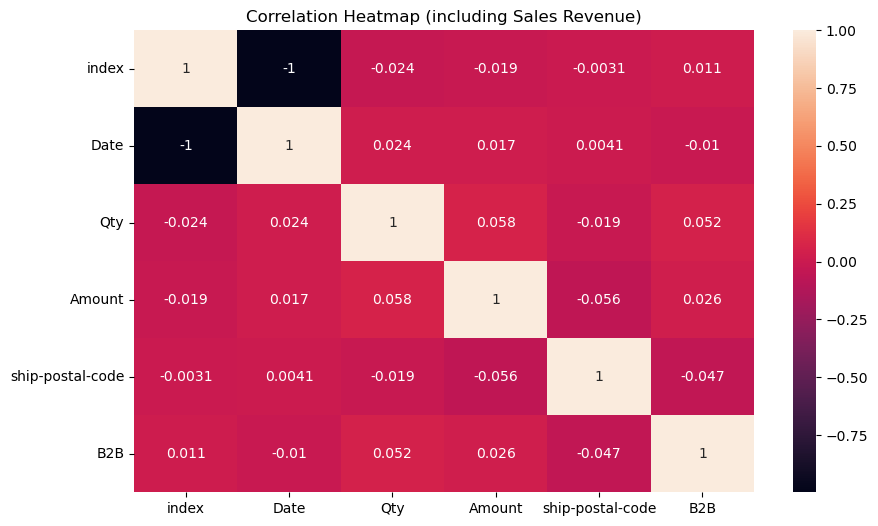

In [159]:
# Create a heatmap to visualize correlations (optional)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap (including Sales Revenue)")
plt.show()

# Python code using Pandas to analyze fulfillment methods used in your Amazon sale report data:


In [160]:
# Analyze fulfillment method distribution

fulfillment_counts = df["Fulfilment"].value_counts()
fulfillment_percentages = (fulfillment_counts / len(df)) * 100
print("Fulfillment Method Distribution:")
print(fulfillment_counts)
print("\nFulfillment Method Percentages:")
print(fulfillment_percentages)

Fulfillment Method Distribution:
Fulfilment
Merchant    10183
Name: count, dtype: int64

Fulfillment Method Percentages:
Fulfilment
Merchant    100.0
Name: count, dtype: float64


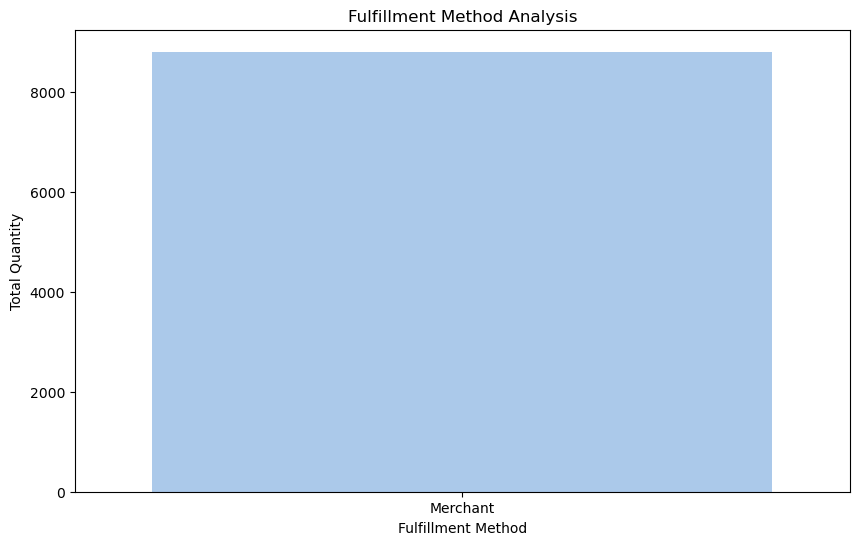

In [161]:
#  Fulfillment Method Analysis

fulfillment_method = df.groupby('Fulfilment')['Qty'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=fulfillment_method.index, y=fulfillment_method.values, palette='pastel')
plt.title('Fulfillment Method Analysis')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Quantity')
plt.show()

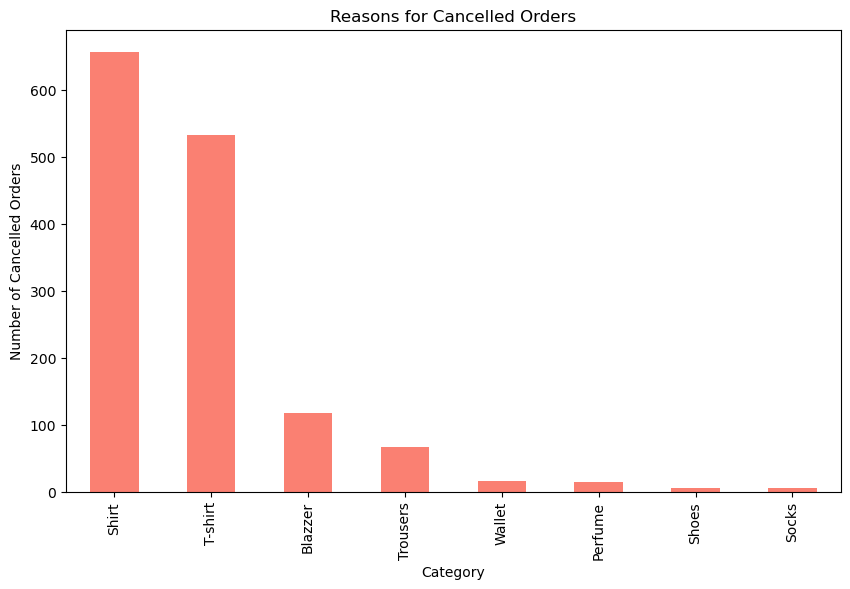

In [162]:
#  Cancelled Orders Analysis

cancelled_orders = df[df['Status'] == 'Cancelled']
cancelled_reasons = cancelled_orders.groupby('Category')['Qty'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
cancelled_reasons.plot.bar(color='salmon')
plt.title('Reasons for Cancelled Orders')
plt.xlabel('Category')
plt.ylabel('Number of Cancelled Orders')
plt.show()

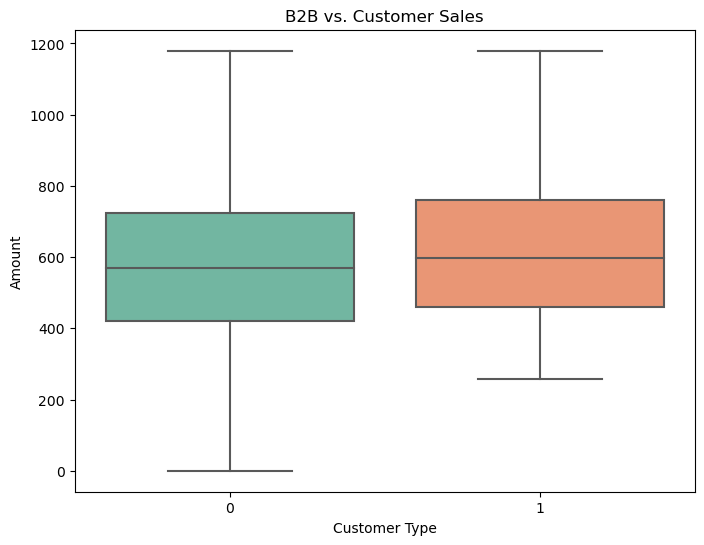

In [163]:
#  B2B vs. Customer Sales

plt.figure(figsize=(8, 6))
sns.boxplot(x='B2B', y='Amount', data=df, palette='Set2')
plt.title('B2B vs. Customer Sales')
plt.xlabel('Customer Type')
plt.ylabel('Amount')
plt.show()

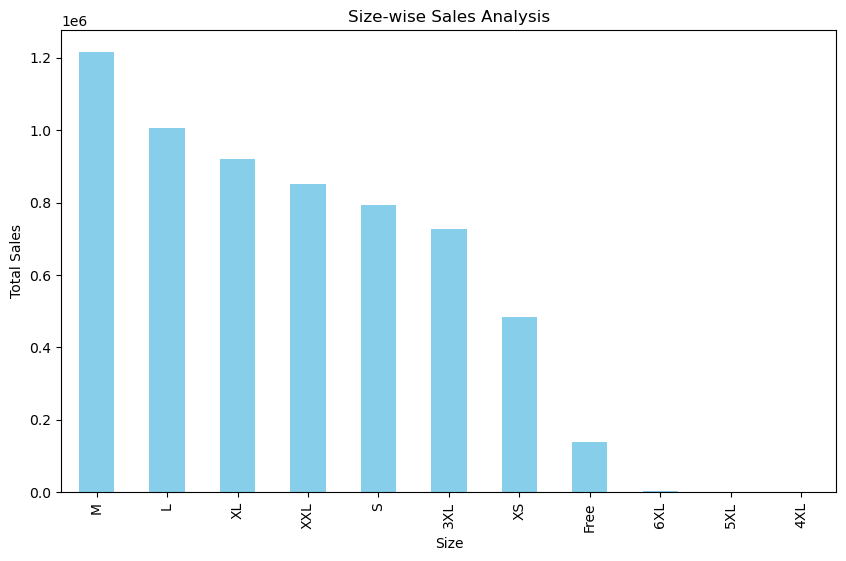

In [123]:
#Size-wise Sales Analysis

size_sales = df.groupby('Size')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
size_sales.plot.bar(color='skyblue')
plt.title('Size-wise Sales Analysis')
plt.xlabel('Size')
plt.ylabel('Total Sales')
plt.show()

C:\Users\Windows 11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Windows 11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Windows 11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Windows 11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Windows 11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


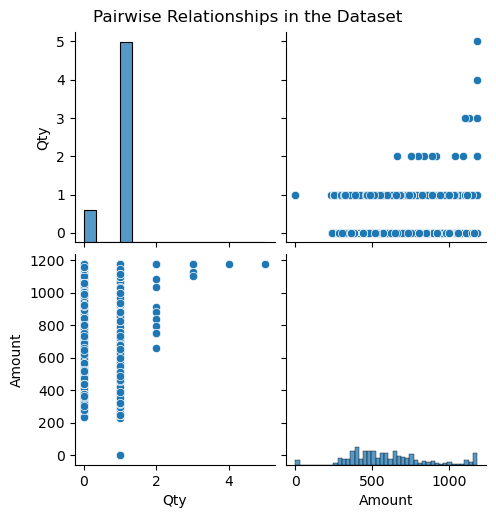

In [164]:
# Pairwise Relationships in the Dataset

sns.pairplot(df[['Qty', 'Amount', 'Date']], palette='husl')
plt.suptitle('Pairwise Relationships in the Dataset', y=1.02)
plt.show()

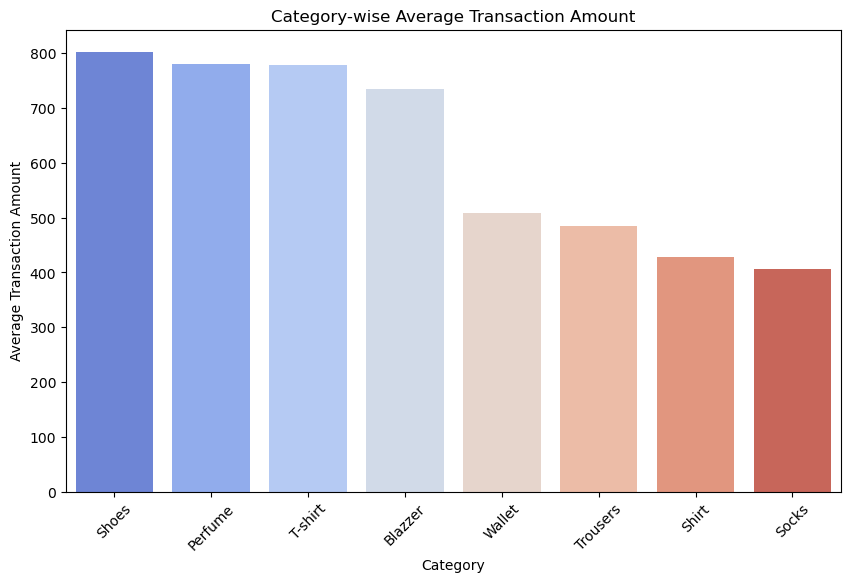

In [165]:
#Category-wise Average Transaction Amount

avg_transaction_amount = df.groupby('Category')['Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transaction_amount.index, y=avg_transaction_amount.values, palette='coolwarm')
plt.title('Category-wise Average Transaction Amount')
plt.xlabel('Category')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.show()

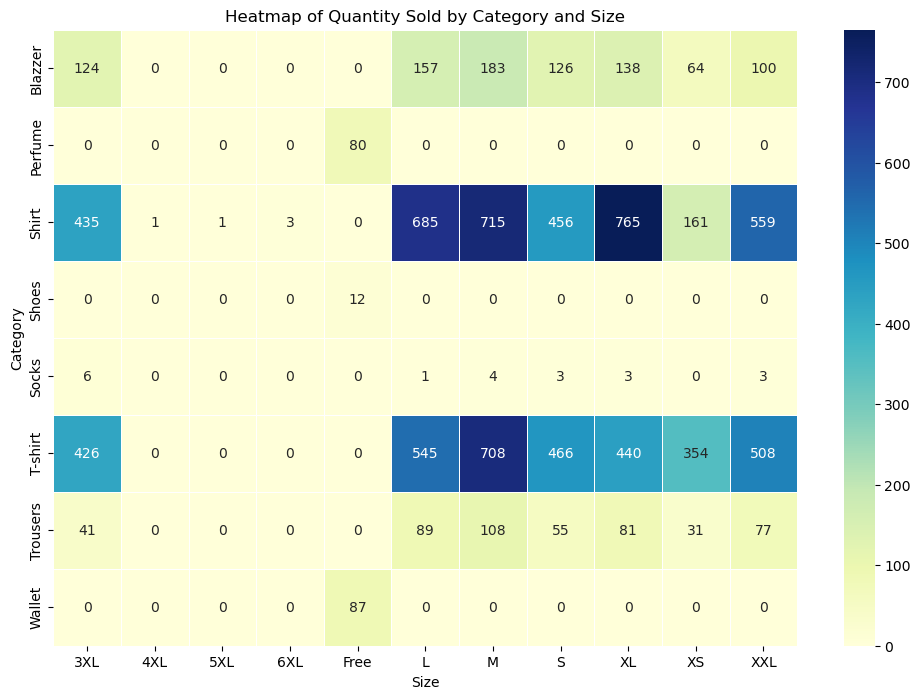

In [128]:
#Heatmap of Quantity Sold by Category and Size

heatmap_data = df.pivot_table(index='Category', columns='Size', values='Qty', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Quantity Sold by Category and Size')
plt.show()

# Python code using Pandas and Matplotlib to create pie charts for analyzing your Amazon sales data:

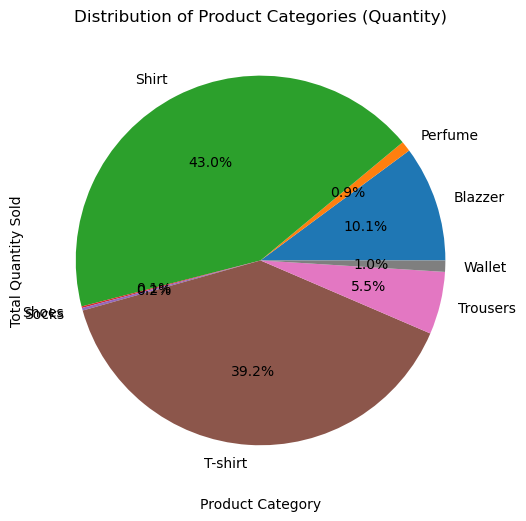

In [167]:
# Pie Chart for Product Category Distribution

category_sales = df.groupby("Category")["Qty"].sum()
plt.figure(figsize=(8, 6))
category_sales.plot(kind="pie", autopct="%1.1f%%")  
plt.title("Distribution of Product Categories (Quantity)")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")  # Rotate category labels for better readability
plt.grid(axis='y')
plt.show()